In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
recordData = pd.read_csv('WorldRecords.csv')

In [3]:
recordData.head()

,Event,Type,Record,Athlete,Nationality,Location,Year
0,Mens 100m,time,10.06,Bob Hayes,United States,"Tokyo, Japan",1964
1,Mens 100m,time,10.03,Jim Hines,United States,"Sacramento, USA",1968
2,Mens 100m,time,10.02,Charles Greene,United States,"Mexico City, Mexico",1968
3,Mens 100m,time,9.95,Jim Hines,United States,"Mexico City, Mexico",1968
4,Mens 100m,time,9.93,Calvin Smith,United States,"Colorado Springs, USA",1983


# Pre-Lab

## Primary Research Question: How has the men’s shotput world record changed over time?  What about the women’s world record? 

### How many different events are represented in the dataset?

In [4]:
len(recordData['Event'].unique())

10

### In what year did Usain Bolt first break the world record for the men's 100m dash?

In [5]:
recordData[(recordData['Athlete'] == 'Usain Bolt') & (recordData['Event'] == 'Mens 100m')]['Year'].iloc[0]

2008

### Who was the first woman to break the women’s 1 mile world record with a time of less than 260 seconds?

In [6]:
recordData[(recordData['Event'] == 'Womens Mile') & (recordData['Record'] < 260)].iloc[0]['Athlete']

'Mary Slaney'

### Subsets of the Data for the Shotput event by gender.

In [7]:
womenShotput = recordData[recordData['Event'] == 'Womens Shotput']
menShotput = recordData[recordData['Event'] == 'Mens Shotput']

### Shotput records by gender for year.

Text(0.5, 1.0, "Men's")

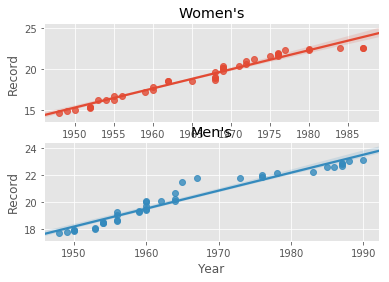

In [8]:
fix, ax = plt.subplots(nrows=2, ncols=1, sharey=False)
plt.rcParams['figure.figsize'] = (10,16)
sns.regplot(womenShotput['Year'], womenShotput['Record'], ax=ax[0]).set_title("Women's")
sns.regplot(menShotput['Year'], menShotput['Record'], ax=ax[1]).set_title("Men's")

### How many records are in the menShotput dataframe?

In [9]:
menShotput.shape[0]

39

### How many records are in the womenShotput dataframe

In [10]:
womenShotput.shape[0]

41

# The Lab

## How have the world record times for the men's and the women’s mile event changed over the years?

In [11]:
menMile = recordData[recordData['Event'] == 'Mens Mile']
womenMile = recordData[recordData['Event'] == 'Womens Mile']

Text(0.5, 1.0, "Men's")

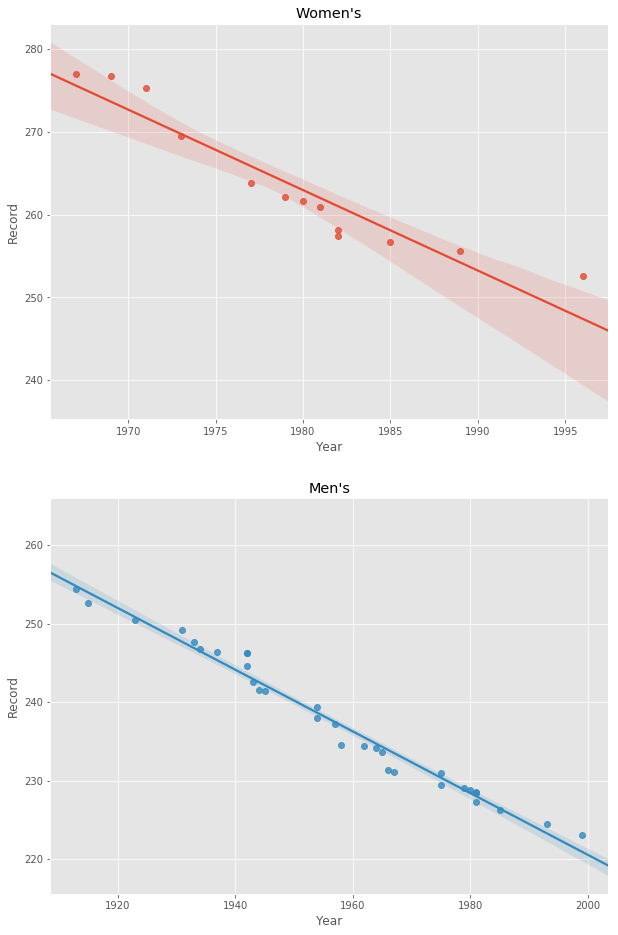

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.rcParams['figure.figsize'] = (10, 16)

sns.regplot(womenMile['Year'], womenMile['Record'], ax=ax[0]).set_title("Women's")
sns.regplot(menMile['Year'], menMile['Record'], ax=ax[1]).set_title("Men's")

### Linear Regression for calculation of the Gradient of the lines above

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Xmale = menMile['Year'].as_matrix().reshape(menMile['Year'].shape[0], 1)
Ymale = menMile['Record'].as_matrix().reshape(menMile['Record'].shape[0], 1)

Xfemale = womenMile['Year'].as_matrix().reshape(womenMile['Year'].shape[0], 1)
Yfemale = womenMile['Record'].as_matrix().reshape(womenMile['Record'].shape[0], 1)

# adding constant for intercepts
Xmale_ones = np.ones((Xmale.shape[0], 1))
Xfemale_ones = np.ones((Xfemale.shape[0], 1))

Xmale = np.concatenate((Xmale_ones, Xmale), axis=1)
Xfemale = np.concatenate((Xfemale_ones, Xfemale), axis=1)

modelMale = sm.OLS(Ymale, Xmale).fit()
modelFemale = sm.OLS(Yfemale, Xfemale).fit()

# What we are interested in is the x1 coef.

print('Male:\n', modelMale.summary())
print('\n\n')
print('Female:\n', modelFemale.summary())

Male:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1301.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           2.88e-26
Time:                        20:01:27   Log-Likelihood:                -54.470
No. Observations:                  32   AIC:                             112.9
Df Residuals:                      30   BIC:                             115.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1007.4707     21.350     47.188  

/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anywa

## Problem Set

### Question 1: We want to find the best-fitting linear model for men's pole vault world records since 1970.

In [14]:
menPolev = recordData[ (recordData['Event'] == 'Mens Polevault') & (recordData['Year'] >= 1970) ]

### What is the standing world record height (in meters) for men's pole vault?

In [15]:
menPolev.iloc[-1,:]['Record']

6.14

###  In what year did the pole vault record first exceed 6 meters? 

In [16]:
menPolev[ menPolev['Record'] > 6].iloc[0,:]['Year']

1986

### Men's Polevault records since 1970 scatterplot and linear fit as a function of the year

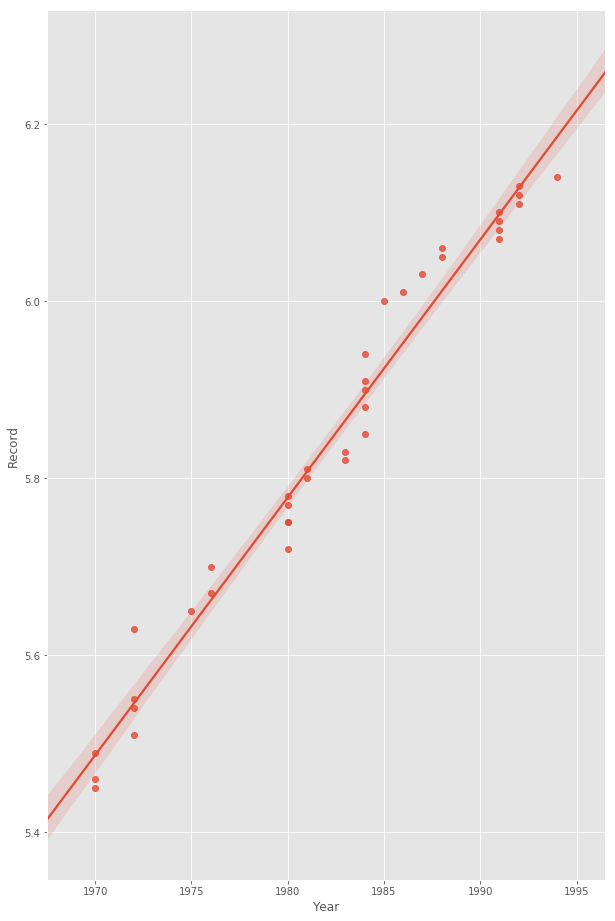

In [17]:
sns.regplot(menPolev['Year'], menPolev['Record'])

In [18]:
Xmenpolev = menPolev['Year'].as_matrix().reshape(menPolev['Year'].shape[0], 1)
Ymenpolev = menPolev['Record'].as_matrix().reshape(menPolev['Record'].shape[0], 1)

Xmenpolev_ones = np.ones((Xmenpolev.shape[0], 1))
Xmenpolev = np.concatenate((Xmenpolev_ones, Xmenpolev), axis=1)

Xmenpolev_model = sm.OLS(Ymenpolev, Xmenpolev).fit()

print(Xmenpolev_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1260.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           4.87e-29
Time:                        19:57:51   Log-Likelihood:                 71.933
No. Observations:                  37   AIC:                            -139.9
Df Residuals:                      35   BIC:                            -136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.8541      1.625    -31.906      0.0

/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/usuario/Descargas/lgalicia/python-FDS/fds/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
